# 111-2 LAT HW1 : Students Adaptability Level in Online Education

In [3]:
import pandas as pd
oedf = pd.read_csv('OE.csv')
import matplotlib.pyplot as plt


In [8]:
oedf.columns = oedf.columns.str.lower()
oedf = oedf.applymap(lambda x: x.lower() if type(x) == str else x)
oedf = oedf.rename(columns={"it student": "IT student"})
oedf = oedf.rename(columns={"location": "live in town"})
oedf['education level'] = oedf['education level'].replace('college', 'university')
oedf['education level'] = oedf['education level'].replace(['school'],['below university']) 

######data overview
ov=oedf.describe().T
ov['allvalue']='s'
for i in oedf.columns:
    allvalue_list=oedf[i].unique().tolist()
    allvalue_strl= ', '.join(['{}'] * len(allvalue_list)).format(*allvalue_list)
    ov.loc[i,'allvalue']=allvalue_strl
new_order = ['count', 'unique', 'allvalue', 'top', 'freq']
ov = ov.reindex(columns=new_order)
ov

,count,unique,allvalue,top,freq
gender,1205,2,"boy, girl",boy,663
age,1205,6,"21-25, 16-20, 11-15, 26-30, 6-10, 1-5",21-25,374
education level,1205,2,"university, below university",university,675
institution type,1205,2,"non government, government",non government,823
IT student,1205,2,"no, yes",no,901
live in town,1205,2,"yes, no",yes,935
load-shedding,1205,2,"low, high",low,1004
financial condition,1205,3,"mid, poor, rich",mid,878
internet type,1205,2,"wifi, mobile data",mobile data,695
network type,1205,3,"4g, 3g, 2g",4g,775


## Univariate Analysis
1.資料集中，男女比例為何？

2.資料集中，年齡分佈為何？

3.資料集中，課時分佈為何？

4.資料集中，教育程度分佈為何？

5.資料集中，適應程度分佈為何？

6.資料集中，公私立比例為何？

7.資料集中，網路流速分佈為何？

8.資料集中，IT學生比例為何？

9.資料集中，網路類型分佈為何？

10.資料集中，經濟狀況分佈為何？

## 1.資料集中，男女比例為何？

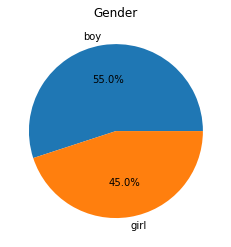

In [563]:
counts = oedf['gender'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Gender')
plt.show()

## 2.資料集中，年齡分佈為何？

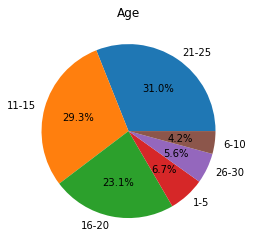

In [564]:
counts = oedf['age'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Age')
plt.show()


## 3.資料集中，課時分佈為何？

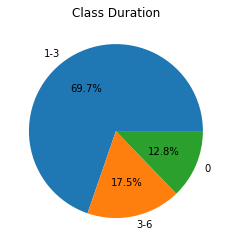

In [565]:
counts = oedf['class duration'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Class Duration')
plt.show()

oedf['class duration'] = oedf['class duration'].replace(['1-5', '6-10','11-15','16-20','21-25','26-30'],[0,1,2,3,4,5])

## 4.資料集中，教育程度分佈為何？

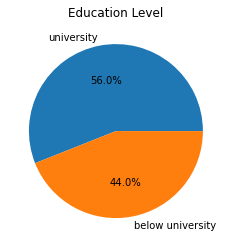

In [566]:
counts = oedf['education level'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Education Level')
plt.show()

## 5.資料集中，適應程度分佈為何？

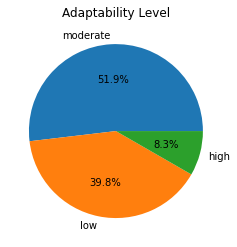

In [567]:
counts = oedf['adaptivity level'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Adaptability Level')
plt.show()

## 6.資料集中，公私立比例為何？

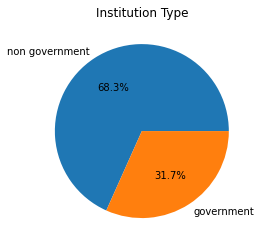

In [568]:
counts = oedf['institution type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Institution Type')
plt.show()

## 7.資料集中，網路流速分佈為何？

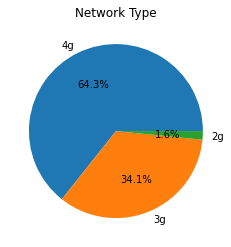

In [569]:
counts = oedf['network type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Network Type')
plt.show()

## 8.資料集中，IT學生比例為何？

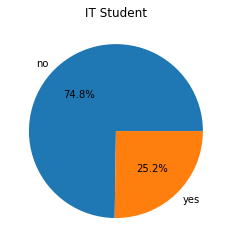

In [570]:
counts = oedf['IT student'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('IT Student')
plt.show()

## 9.資料集中，網路類型分佈為何？

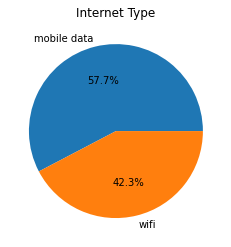

In [571]:
counts = oedf['internet type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Internet Type')
plt.show()

## 10.資料集中，經濟狀況分佈為何？

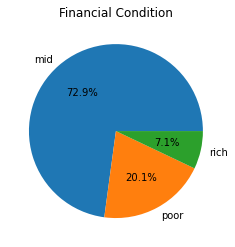

In [572]:
counts = oedf['financial condition'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Financial Condition')
plt.show()

## 問題 Multivariate Analysis
### 因為資料比例不平衡，所以接比較比例而非數量
11.資料集中，男女是IT student 的比例相對高的是？

12.資料集中，男女的adaptability level相對高的是？


## 7.資料集中，男女是IT student 的比例相對高的是？

In [573]:
oedf['IT student'] = oedf['IT student'].replace(['no', 'yes'],[0,1])
crosstab_IT_G = pd.crosstab(oedf['gender'], oedf['IT student'])
crosstab_IT_G

IT student,0,1
gender,,
boy,435,228
girl,466,76


#### 雖然看得出男生是IT的人數比女生是IT的人數多，但由於男生樣本數本來就比女生多
#### 所以用boy_IT/boy跟gril_IT/gril來做精確數據比較，出來的結果比較有說服力

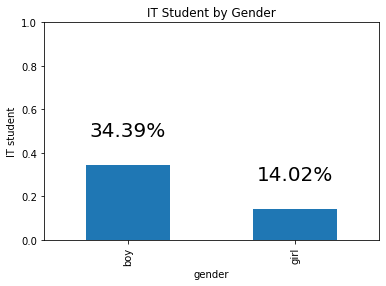

In [574]:
IT_G=oedf.groupby('gender')['IT student'].mean()
ig=IT_G.plot(kind='bar')
plt.title('IT Student by Gender')
plt.xlabel('gender')
plt.ylabel('IT student')
ig.set_ylim([0, 1])
for i in ax.containers:
    ig.bar_label(i, label_type='edge', labels=[f'{x:.2%}' for x in i.datavalues],fontsize=20, color='black', padding=25)
plt.show()

## 8.資料集中，男女的adaptability level相對高的是？

In [582]:
oedf['adaptivity level'] = oedf['adaptivity level'].replace(['low','moderate','high'],[0,1,2])
crosstab_ADAPT_G = pd.crosstab(oedf['gender'], oedf['adaptivity level'])
crosstab_ADAPT_G

adaptivity level,0,1,2
gender,,,
boy,245,347,71
girl,235,278,29


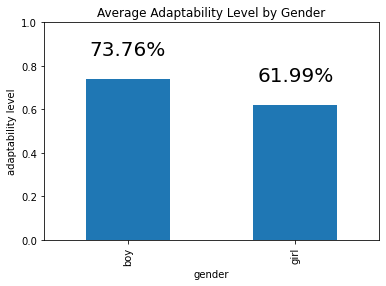

In [583]:
ADAPT_G=oedf.groupby('gender')['adaptivity level'].mean()
ag=ADAPT_G.plot(kind='bar')
plt.title('Average Adaptability Level by Gender')
plt.xlabel('gender')
plt.ylabel('adaptability level')
ag.set_ylim([0, 1])
for i in ag.containers:
    ag.bar_label(i, label_type='edge', labels=[f'{x:.2%}' for x in i.datavalues],fontsize=20, color='black', padding=20)
plt.show()

oedf['adaptivity level'] = oedf['adaptivity level'].replace(['low','moderate','high'],[0,1,2])
oedf['education level'] = oedf['education level'].replace(['school', 'university'],[0,1])
oedf['self lms'] = oedf['self lms'].replace(['no', 'yes'],[0,1])
oedf['live in town'] = oedf['live in town'].replace(['no', 'yes'],[0,1])
oedf['financial condition'] = oedf['financial condition'].replace(['poor', 'mid','rich'],[0,1,2])

oedf.groupby('IT student').sum()

## 發現chatgpt會害死我，因為我copy 一個可行的程式碼，希望能幫助我減少男女失衡的影響，可行是可行，但結果的比例還是一樣差很大，我覺得其中一定有什麼誤會......
以Kaggle上"Students Adaptability Level in Online Education"資料集為例，其男女比例為55:45，在進行IT student 與gender間的分析，要如何減少男女比例不平衡帶來的影響？用python解決
可以進行分層抽樣 (stratified sampling)，將樣本分層後在每個層次內進行隨機抽樣，使得樣本更能代表整體族群，進而減少比例不平衡所帶來的影響。

以下是一個示範：

首先，我們可以使用 pandas 的 crosstab 函數來計算 IT student 與 gender 的交叉表，以瞭解男女比例不平衡的情況。

python
Copy code
import pandas as pd



### 讀取資料集
df = pd.read_csv('StudentsAdaptability.csv')

### 計算 IT student 與 gender 的交叉表
crosstab = pd.crosstab(df['IT Student'], df['Gender'])
print(crosstab)
執行結果：

Gender      Boy  Girl
IT Student          
No          352   296
Yes         199   190
可以看出男女比例確實不平衡。

接著，我們可以使用 StratifiedShuffleSplit 類別進行分層抽樣。以下是示範程式碼：


from sklearn.model_selection import StratifiedShuffleSplit

### 將資料分成訓練集和測試集，並進行分層抽樣
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Gender']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]
上述程式碼中，我們使用 StratifiedShuffleSplit 類別將資料分成訓練集和測試集，並將 Gender 作為分層依據。這樣可以確保在訓練集和測試集中男女比例的比例相同。

最後，我們可以再次計算 IT student 與 gender 的交叉表，以確認分層抽樣的效果。


### 計算分層抽樣後的 IT student 與 gender 的交叉表
train_crosstab = pd.crosstab(train_set['IT Student'], train_set['Gender'])
test_crosstab = pd.crosstab(test_set['IT Student'], test_set['Gender'])

print('Training set:')
print(train_crosstab)
print('Testing set:')
print(test_crosstab)
執行結果：


Training set:
Gender      Boy  Girl
IT Student          
No          281   237
Yes         159   152

Testing set:
Gender      Boy  Girl
IT Student          
No           71    59
Yes          40    38

## 用資料實際試試

import pandas as pd
import seaborn as sns


# 创建交叉表
cross_tab = pd.crosstab(oedf['IT student'], oedf['gender'])

# 显示交叉表
print(cross_tab)

# 使用热力图可视化交叉表
sns.heatmap(test_crosstab, cmap='Blues', annot=True, fmt='d')
from sklearn.model_selection import StratifiedShuffleSplit

# 將資料分成訓練集和測試集，並進行分層抽樣
split = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)
for train_index, test_index in split.split(oedf, oedf['gender']):
    train_set = oedf.loc[train_index]
    test_set = oedf.loc[test_index]
    train_crosstab = pd.crosstab(train_set['IT student'], train_set['gender'])
test_crosstab = pd.crosstab(test_set['IT student'], test_set['gender'])

print('Training set:')
print(train_crosstab)
print('Testing set:')
print(test_crosstab)

import matplotlib.pyplot as plt

counts = oedf['adaptivity level'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Adaptability Level')
plt.show()
counts = oedf['education level'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Education Level')
plt.show()
counts = oedf['gender'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Gender')
plt.show()
counts = oedf['age'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Age')
plt.show()
counts = oedf['institution type'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Institution Type')
plt.show()
counts = oedf['class duration'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Class Duration')
plt.show()